#### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
import numpy as np
from numpy import pi
np.set_printoptions(precision=4, suppress=True)

In [4]:
import wavegen as waves
from freq_domain import plotspec
import global_params as G
from utilities import power

In [5]:
from scipy import signal

#### Delta

<IPython.core.display.Javascript object>


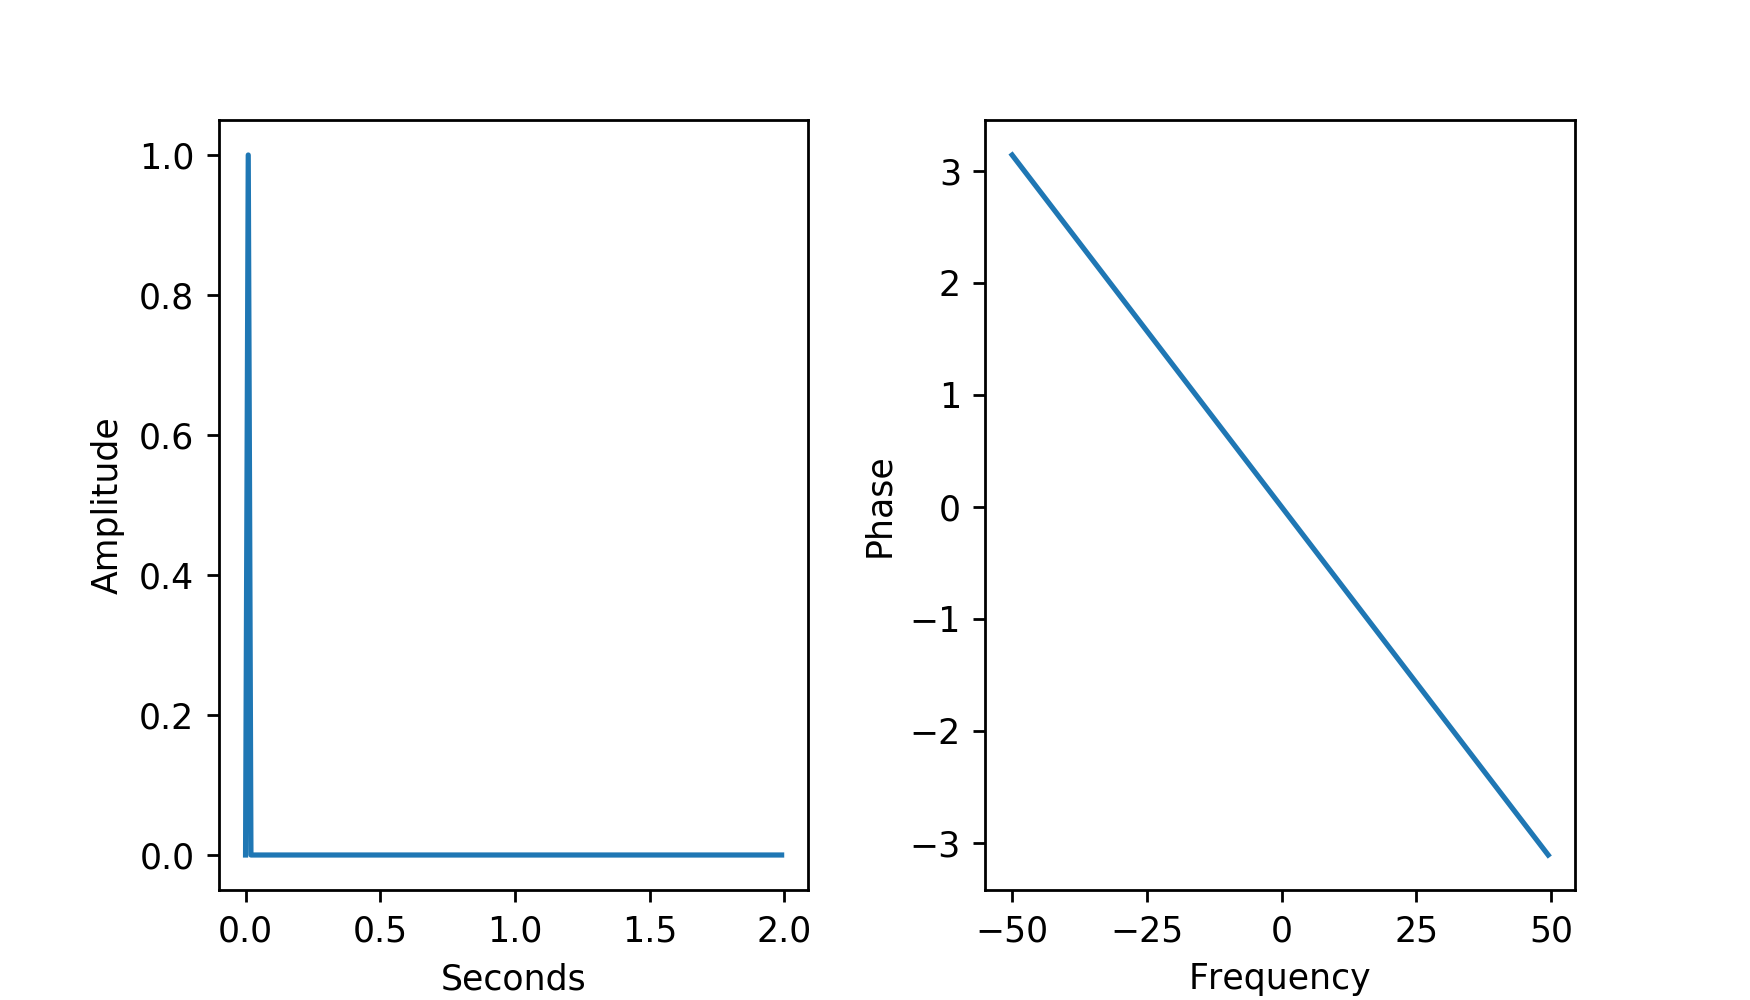

In [6]:
duration = 2
Ts = 1/100
t = np.arange(0, duration, Ts)
x = np.zeros_like(t)
x[1] = 1
plotspec(x, Ts, False);

<IPython.core.display.Javascript object>


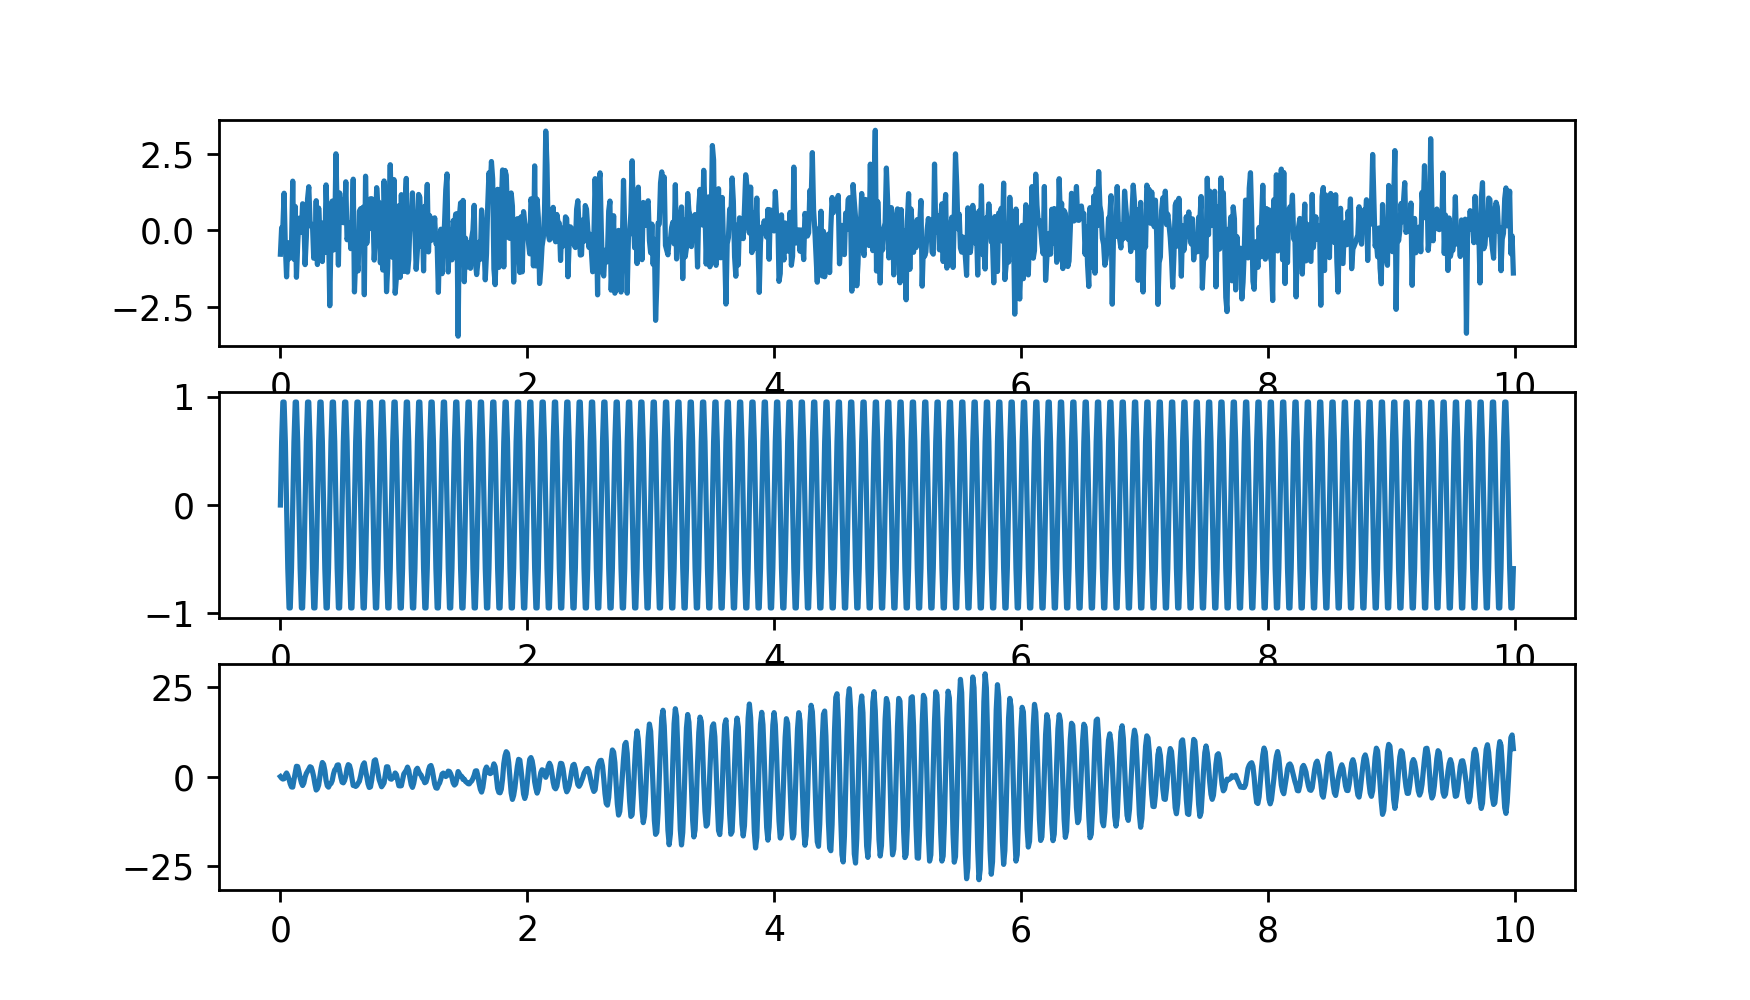

In [7]:
## Pulse train
duration = 2
Ts = 1/100
t = np.arange(0, duration, Ts)
x = np.zeros_like(t)
x[::20] = 1
plotspec(x, Ts);

#### Convolution

<IPython.core.display.Javascript object>


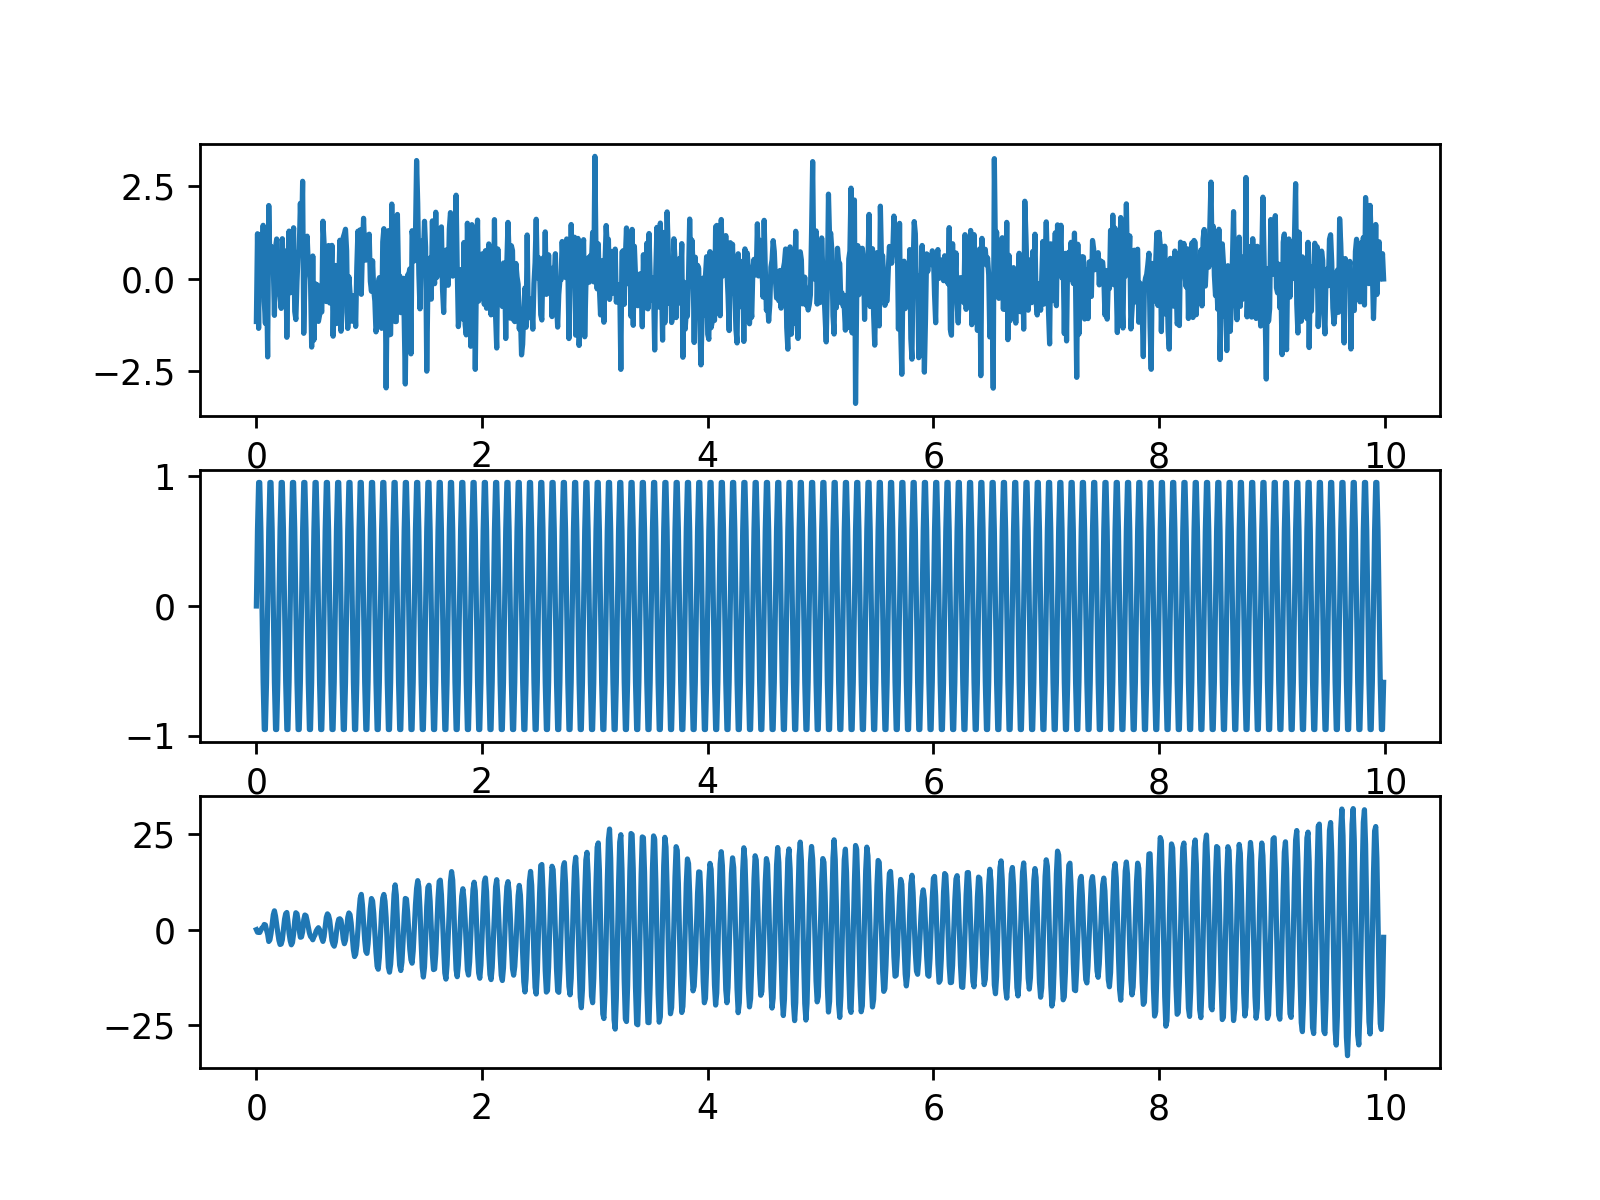

In [14]:
duration = 10
Ts = 1/100
t = np.arange(0, duration, Ts)

# Impulse response
h = np.exp(-t)
h = np.sin(2*np.pi*10*t)

# Impulses
x = np.zeros_like(t)
x[100] = 3
x[300] = 2

# AWGN
x = waves.awgn(duration, Ts)

# Output
y = np.convolve(x, h)

plt.subplot(311); plt.plot(t, x)
plt.subplot(312); plt.plot(t, h)
plt.subplot(313); plt.plot(t, y[:len(t)]);

<IPython.core.display.Javascript object>


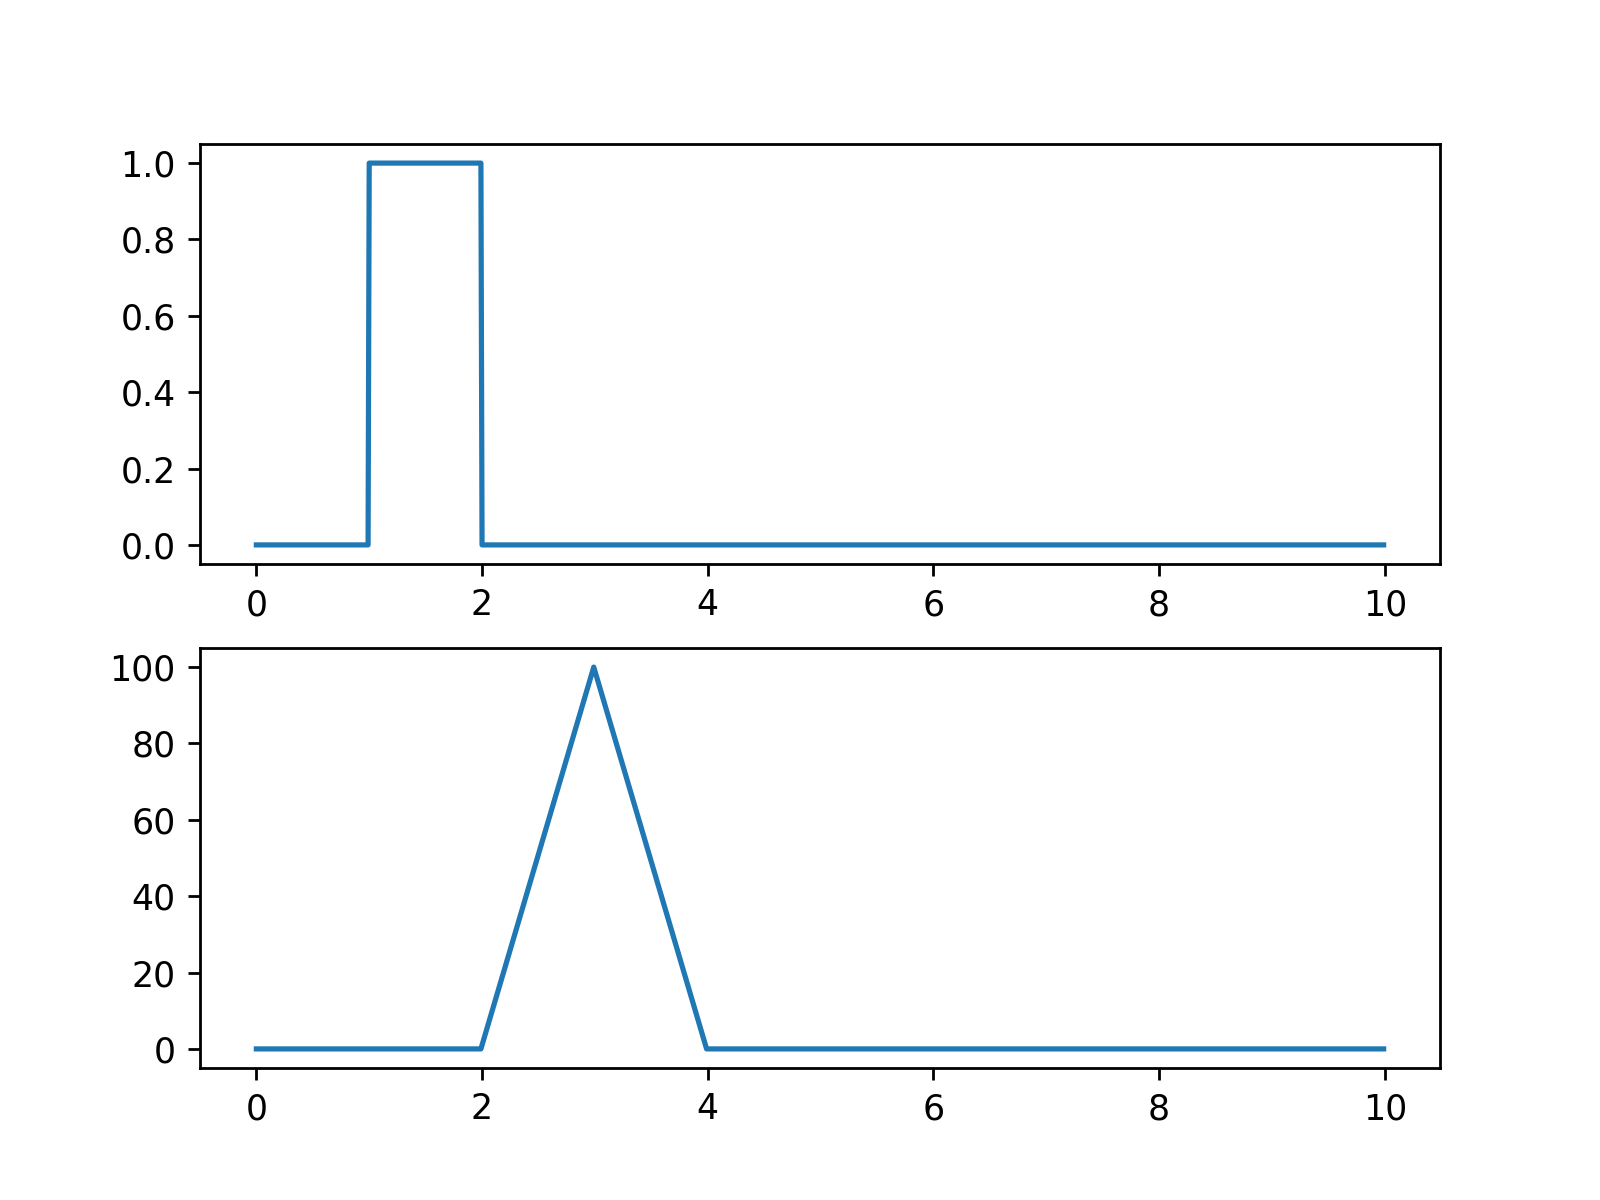

In [13]:
# Ex 4.15
duration = 10
Ts = 1/100
t = np.arange(0, duration, Ts)

w = np.zeros_like(t)
w[100:200] = 1
y = np.convolve(w, w, 'full')

plt.subplot(211); plt.plot(t, w)
plt.subplot(212); plt.plot(t, y[:len(t)])

In [11]:
duration = 3
Ts = 1/20000

x = 2*waves.bandlimited(3000, 4000, duration, Ts)
n = 0.25*waves.awgn(duration, Ts)

freqs = [0, 0.29, 0.3, 0.4, 0.41, 1]
amps = [0, 0, 1, 1, 0, 0]
b = signal.firls(99, freqs, amps)

y = signal.lfilter(b, 1, x+n)
yx = signal.lfilter(b, 1, x)
yn = signal.lfilter(b, 1, n)
z = yx + yn

print(f'Sanity check : {max(np.abs(y - z)):.2f} ')
print(f'Input SNR: {power(x)/power(n):.3f}')
print(f'Output SNR: {power(yx)/power(yn):.3f}')

Sanity check : 0.00 
Input SNR: 6.828
Output SNR: 65.780


plt.close('all')